In [1]:
""" FEATURE MATCHING """
# 1. F.M EXTRACTS FEATURE FROM I/P IMAGE BY ANY TECHINQUE (EDGE ,CORNER, CONTOUR DETECTION)
# 2. USING DISTANCE CALCULATION & FIND ALL MATCHES IN SECONDARY IMAGE
# 3. NO LONGER REQUIRED TO HAVE EXECT COPY OF THE TARGET IMAGE

' FEATURE MATCHING '

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [17]:
reeses = cv2.imread('/home/linux/Desktop/Computer Vision/5. Object Detection with opencv and python/DATA/reeses_puffs.png',0)

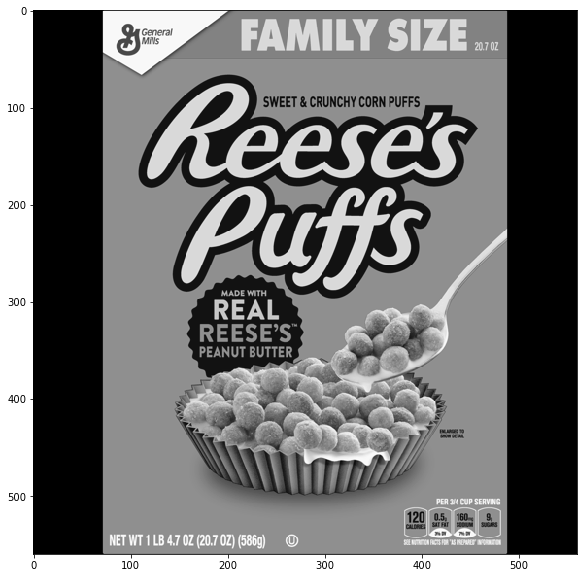

In [18]:
display(reeses)

In [19]:
cereals = cv2.imread('/home/linux/Desktop/Computer Vision/5. Object Detection with opencv and python/DATA/many_cereals.jpg',0)

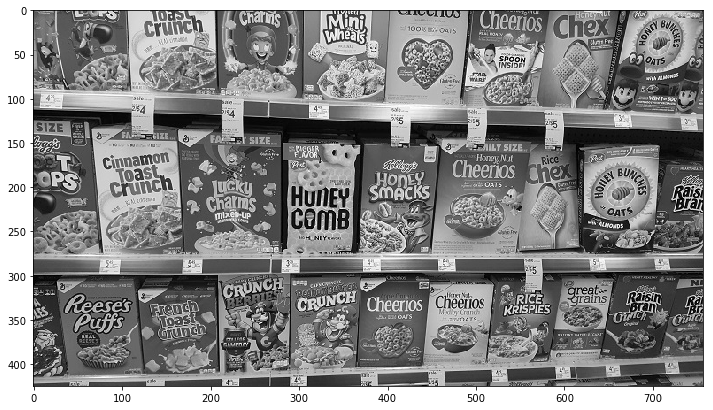

In [20]:
display(cereals)

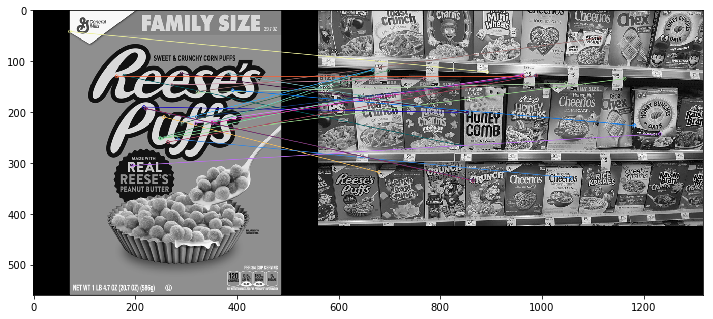

In [21]:
# 1st method ORB 

# Initiate ORB detector
orb = cv2.ORB_create() 

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(reeses,None )
kp2, des2= orb.detectAndCompute(cereals,None )   

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

# Display
display(reeses_matches)

In [24]:
# 2nd method Brute-Force Matching with SIFT Descriptors and Ratio Test

# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test # to calculate best match of 2 matches
good = []

# ratio match < 75% match 2
for match1,match2 in matches:
    # If match 1 disrtance is less than 75% of match 2 distance
    # Then descriptor was a good match lets keep it!  
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

In [ ]:
# 3rd method FLANN based Matcher
# it's better in general matching

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)

display(flann_matches)

In [ ]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0), # line color
                   singlePointColor = (255,0,0), # point color
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

display(flann_matches)